In [2]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

Welcome to JupyROOT 6.12/06


In [3]:
from evwTools import *

In [4]:
#f = r.TFile("./data/gm2offline_ana_100files_fullTrees.root")
#f = r.TFile("./data/dataExternal/Oct16DataSet/gm2offline_ana_12396057_16369.00196.root")
#f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_13084967_16358.00241.root") #v9_08 energy update
#f = r.TFile("./data/dataExternal/Nov7_v08_EnergyFix/results_full_v9_08_00_Nov7_EnergyFix.root")
f = r.TFile("./data/dataExternal/Nov14_v11_60hr_PartialSet_WrongTimeConstants/results_full_partial_v9_11_Nov14.root")

#f = r.TFile("./data/gm2offline_ana_v11_Nov14.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

In [5]:
f.cd("farline")
f.ls()

TFile**		./data/dataExternal/Nov14_v11_60hr_PartialSet_WrongTimeConstants/results_full_partial_v9_11_Nov14.root	
 TFile*		./data/dataExternal/Nov14_v11_60hr_PartialSet_WrongTimeConstants/results_full_partial_v9_11_Nov14.root	
  TDirectoryFile*		farline	farline (ReconComparisonEastVsWest) folder
   OBJ: TTree	eventTree	eventTree : 0 at: 0x7ffffd80b600
   OBJ: TTree	eastTree	eastTree : 0 at: 0x7ffffd805120
   OBJ: TTree	evwTree	evwTree : 0 at: 0x7ffffd815bc0
   OBJ: TTree	evwNoPartnerTree	evwNoPartnerTree : 0 at: 0x7ffffd8078a0
   OBJ: TTree	wveTree	wveTree : 0 at: 0x7ffffd8055a0
   OBJ: TTree	wveNoPartnerTree	wveNoPartnerTree : 0 at: 0x7ffffdcc9d60
   KEY: TDirectoryFile	evw_calo1;1	evw_calo1
   KEY: TDirectoryFile	evw_calo2;1	evw_calo2
   KEY: TDirectoryFile	evw_calo3;1	evw_calo3
   KEY: TDirectoryFile	evw_calo4;1	evw_calo4
   KEY: TDirectoryFile	evw_calo5;1	evw_calo5
   KEY: TDirectoryFile	evw_calo6;1	evw_calo6
   KEY: TDirectoryFile	evw_calo7;1	evw_calo7
   KEY: TDirectoryFile	evw_ca

In [6]:
terr.SetFillColorAlpha(38,0.5)
terr2.SetFillColorAlpha(45,0.5)

---

Lets first look at the east clusters with no partners

In [6]:
terr.Print()

******************************************************************************
*Tree    :evwNoPartnerTree: evwNoPartnerTree                                       *
*Entries :   106947 : Total =        19199667 bytes  File  Size =    4632846 *
*        :          : Tree compression factor =   4.15                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :   106947 : Total  Size=     430722 bytes  File Size  =      14671 *
*Baskets :       25 : Basket Size=      32000 bytes  Compression=  29.30     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :   106947 : Total  Size=     430809 bytes  File Size  =      16072 *
*Baskets :       25 : Basket Size=      32000 bytes  Compression=  26.75     *
*.............................................

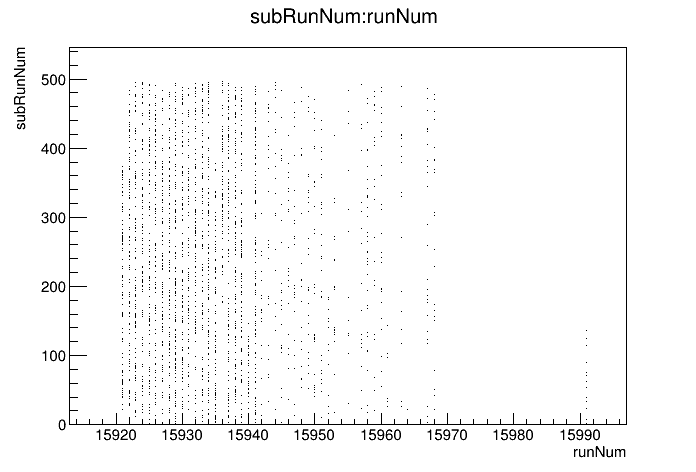

In [7]:
c = r.TCanvas()
terr.Draw("subRunNum:runNum","","")
c.Draw()

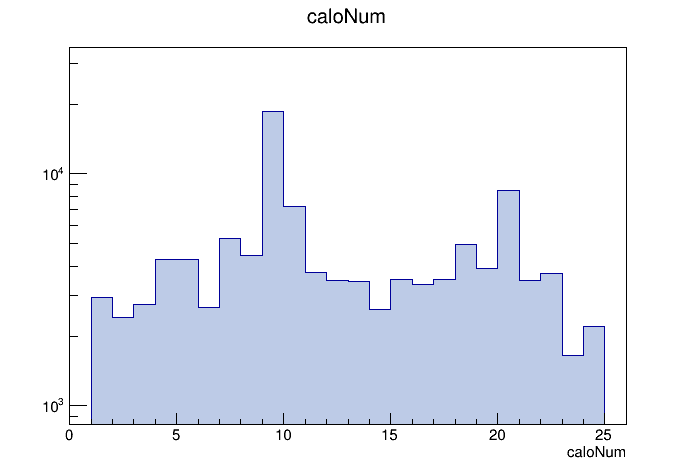

In [8]:
c = r.TCanvas()
terr.Draw("caloNum","")
c.SetLogy()
c.Draw()

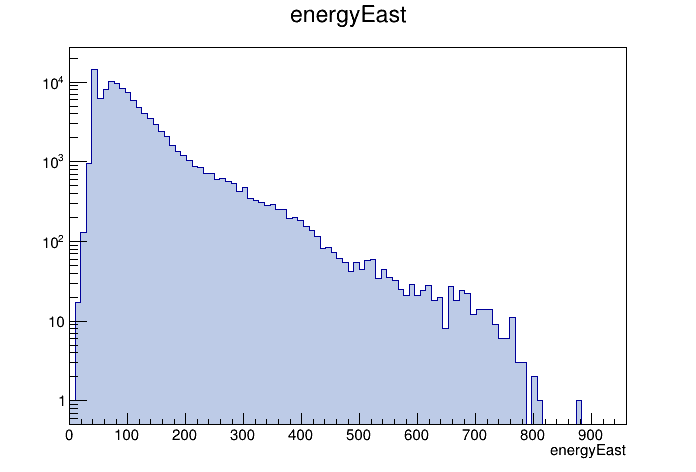

In [9]:
c = r.TCanvas()
terr.Draw("energyEast")
c.SetLogy()
c.Draw()

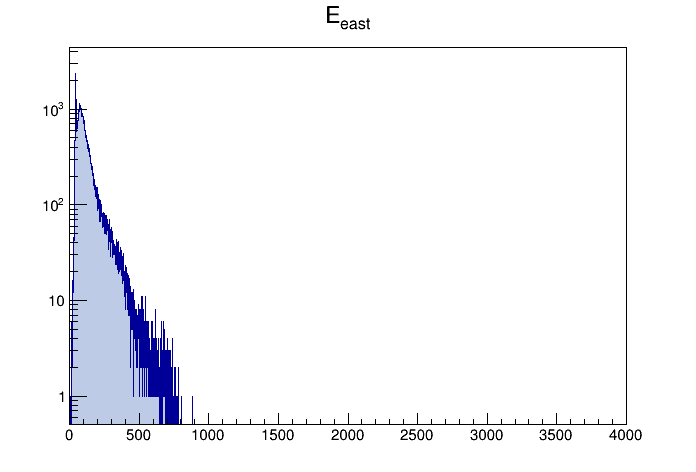

In [10]:
c = r.TCanvas()
hi = r.TH1D("hi","E_{east}",4000,0,4000)
terr.Draw("energyEast>>hi","","goff")
hi.SetFillColorAlpha(38,0.5)
hi.Draw()

c.SetLogy()
c.Draw()

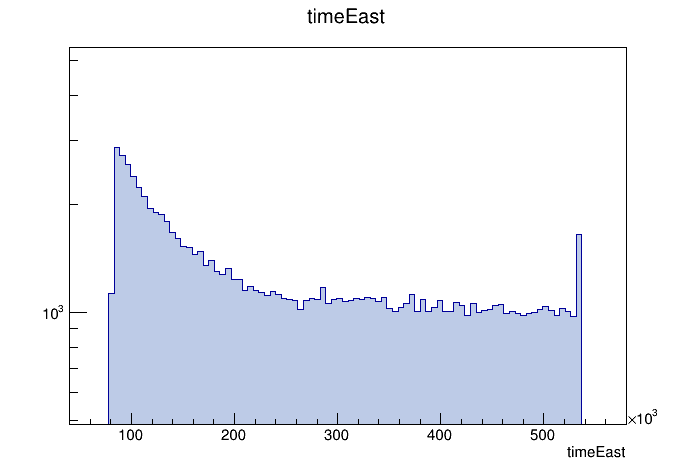

In [11]:
c = r.TCanvas()
terr.Draw("timeEast")
c.SetLogy()
c.Draw()

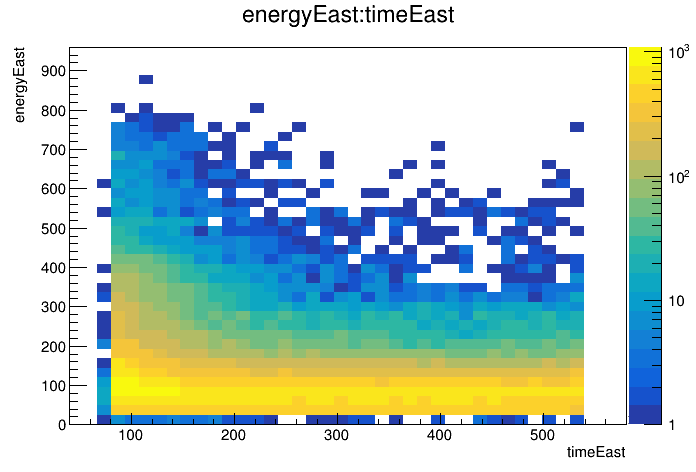

In [12]:
c = r.TCanvas()
terr.Draw("energyEast:timeEast","","colz")
#c.SetLogy()
c.SetLogz()
c.Draw()

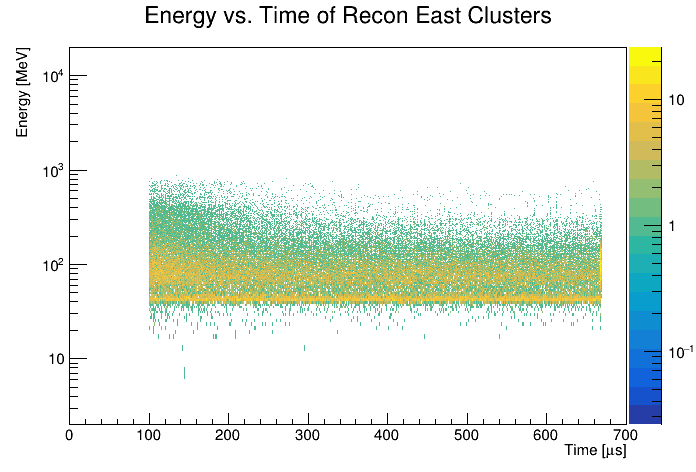

In [7]:
c = r.TCanvas()
hi = r.TH2D("hi","Energy vs. Time of Recon East Clusters; Time [#mus]; Energy [MeV]"
            ,700,0,700,10000,0,20000)
terr.Draw("energyEast:timeEast/1000*1.25>>hi","","goff")
#hi.GetZaxis().SetRangeUser(1,10)
hi.Draw("colz")
c.SetLogz()
c.SetLogy()
c.Draw()

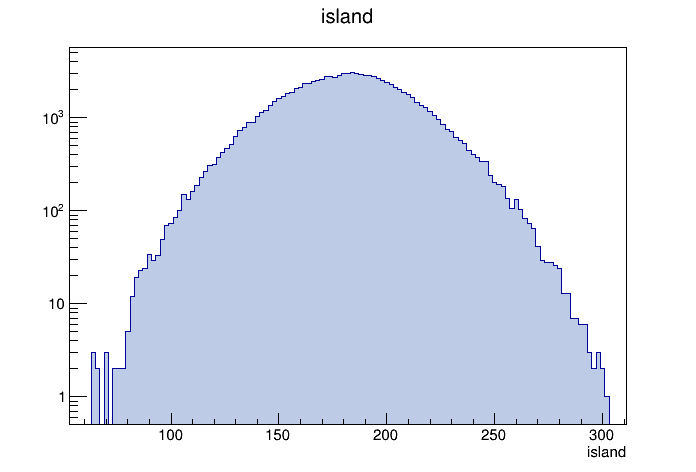

In [14]:
c = r.TCanvas()
terr.Draw("island")
c.SetLogy()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).


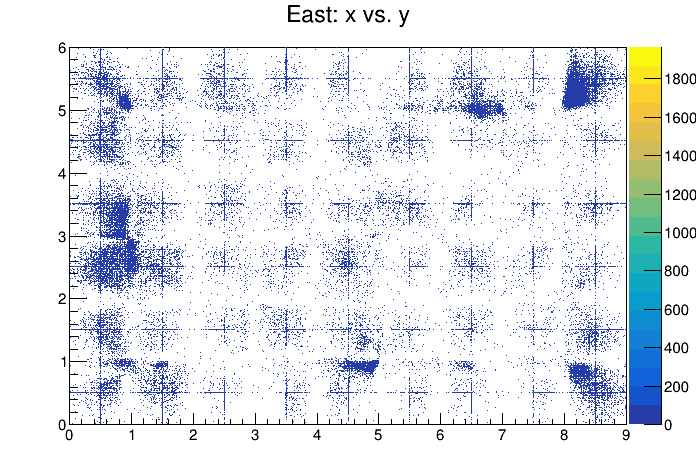

In [15]:
c = r.TCanvas()
hi = r.TH2D("hi","East: x vs. y",900,0,9,600,0,6)
terr.Draw("positionEast.second:positionEast.first>>hi","","goff")
hi.Draw("colz")
c.Draw()

In [16]:
positionsVec = []
for i in range(24):
    hi = r.TH2D("hi","Positions of Lonely Recon East Clusters in Calo "+str(i+1),900,0,9,600,0,6)
    terr.Draw("positionEast.second:positionEast.first>>hi","caloNum == "+str(i+1),"goff")
    positionsVec.append(hi.Clone("h"+str(i+1)))

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirector

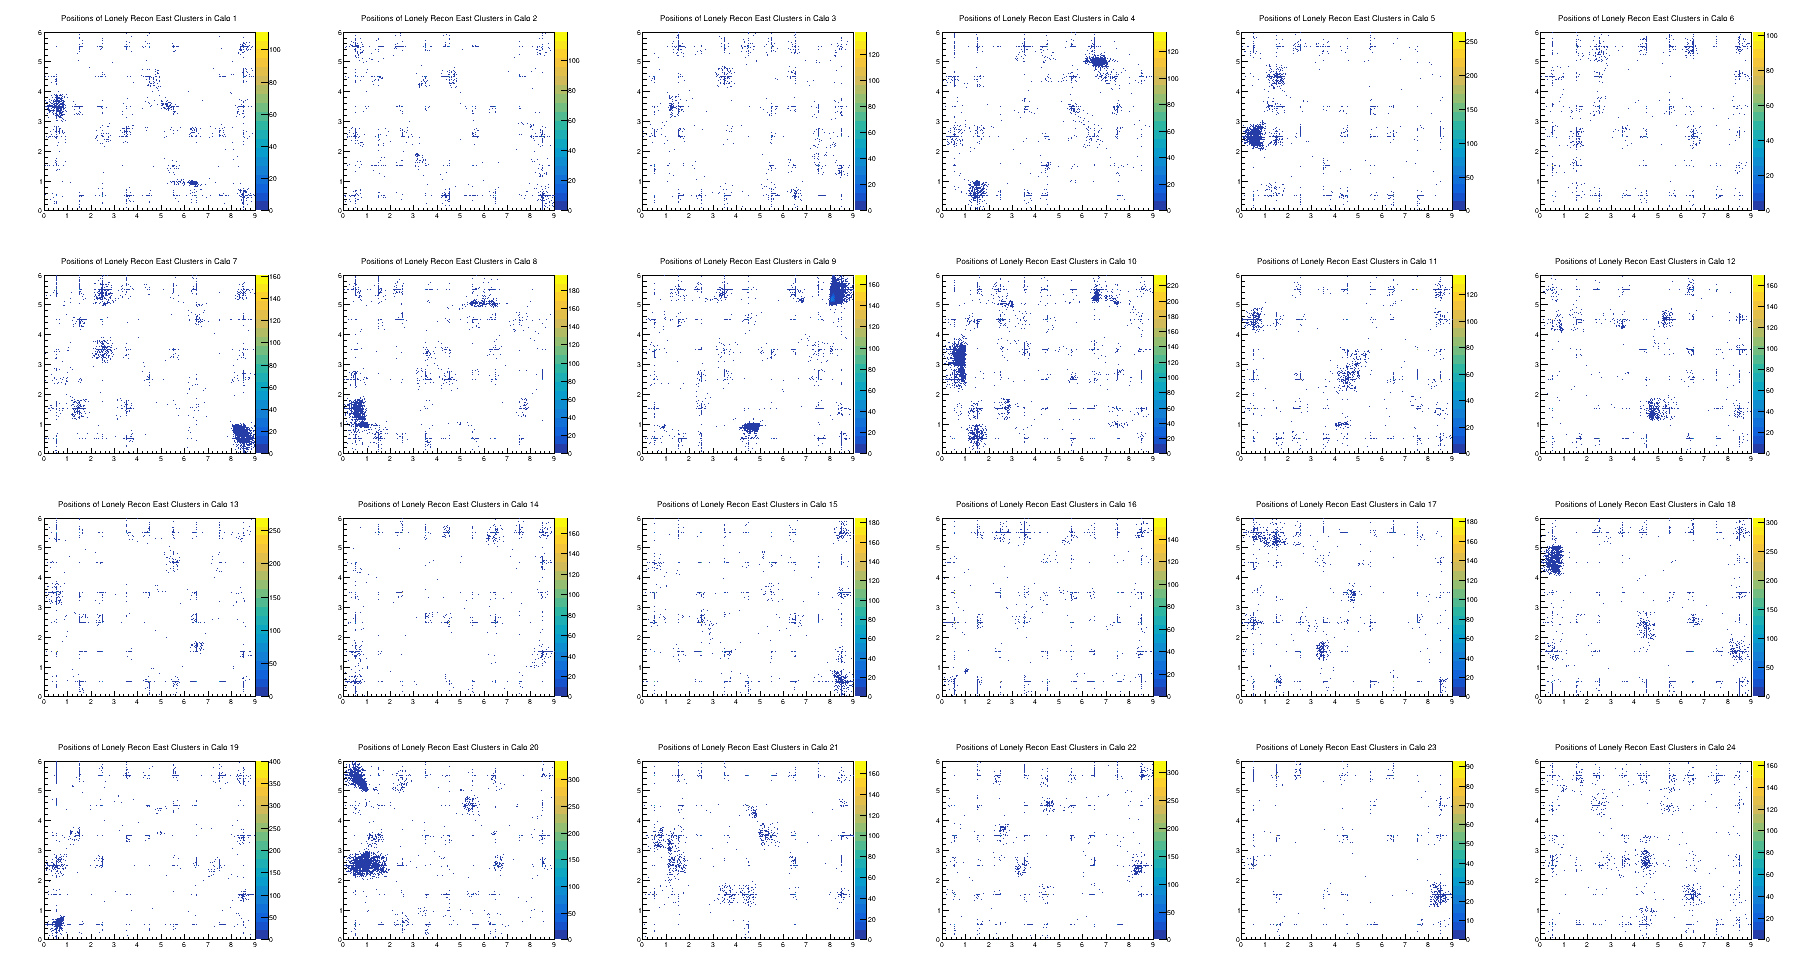

In [17]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(6,4)
nEast = []
for i, hi in enumerate(positionsVec):
    c.cd(i+1)
    hi.Draw("COLZ")
    nEast.append(hi.GetEntries())
c.Draw()

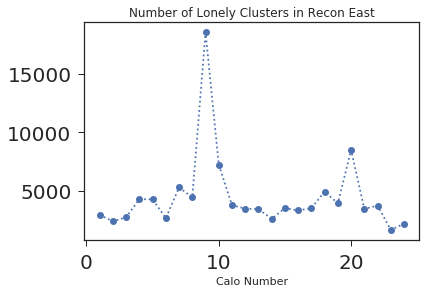

In [18]:
plt.plot([x+1 for x in range(24)],nEast,'o:')
plt.title('Number of Lonely Clusters in Recon East')
plt.xlabel('Calo Number')
plt.show()

In [19]:
positionsVec9Ecut = []
ebin = 10
for i in range(24):
    hi = r.TH2D("hi","Positions of Lonely Recon East Clusters in Calo 9 ["+str(ebin*(i))+" MeV < E < "+str(ebin*(i+1))+" MeV]",900,0,9,600,0,6)
    terr.Draw("positionEast.second:positionEast.first>>hi","caloNum == 9 && energyEast < "+str(ebin*(i+1))+" && energyEast > "+str(ebin*i),"goff")
    positionsVec9Ecut.append(hi.Clone("h"+str(i+1)))

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirector

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


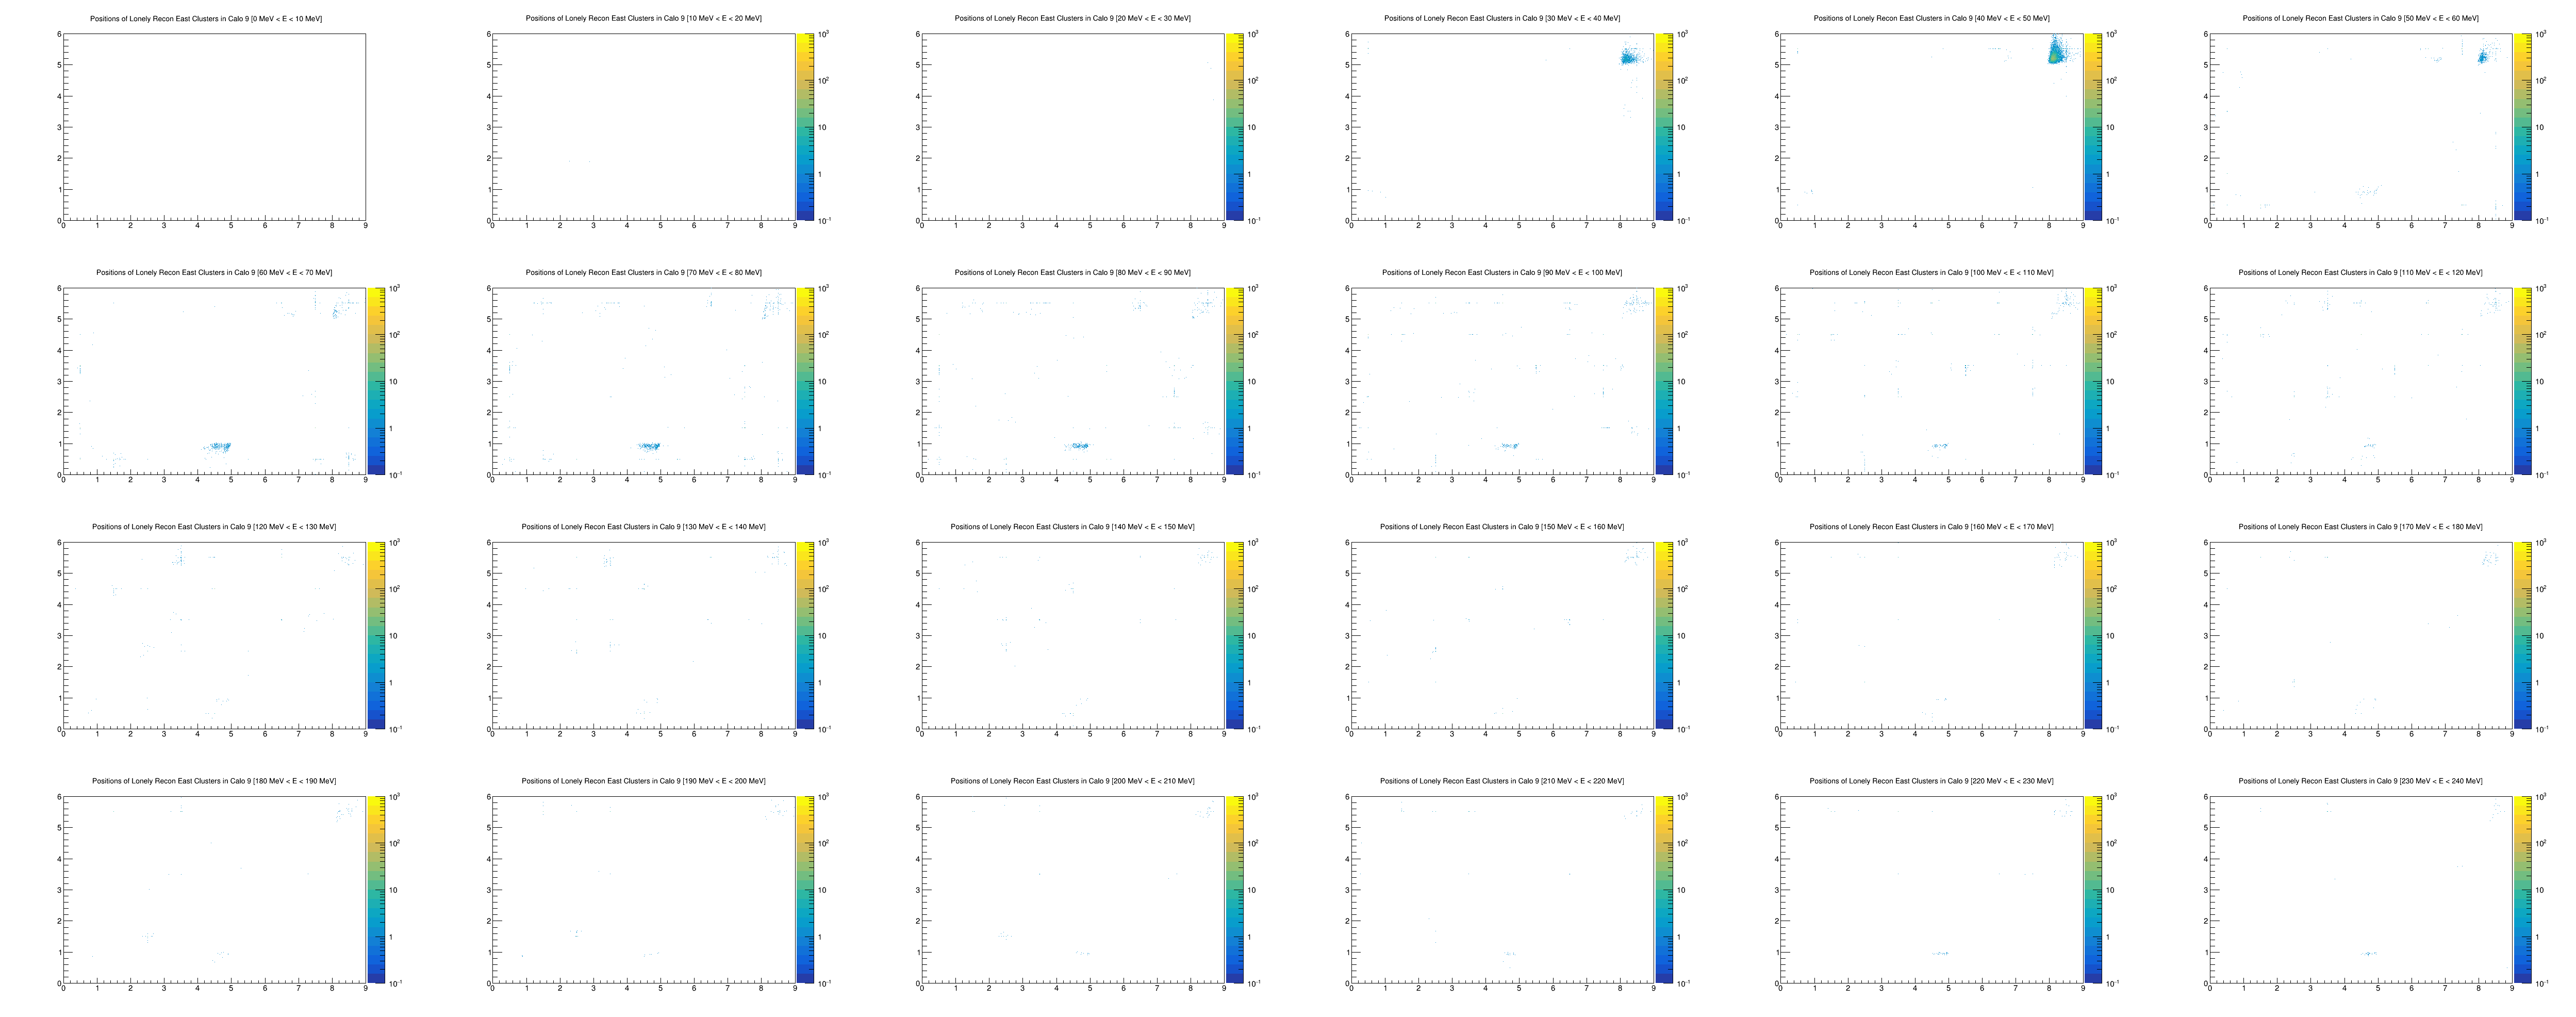

In [20]:
nEcut = []

c = r.TCanvas("c","c",5000,2000)
c.Divide(6,4)
for i, hi in enumerate(positionsVec9Ecut):
    c.cd(i+1)
    hi.GetZaxis().SetRangeUser(0.1,1000)
    r.gPad.SetLogz()
    hi.Draw("COLZ")
    nEcut.append(hi.GetEntries())
c.Draw()

In [21]:
nEcut = []
for i, hi in enumerate(positionsVec9Ecut):
    nEcut.append(hi.GetEntries())

[0.0, 2.0, 3.0, 1333.0, 11208.0, 683.0, 771.0, 873.0, 701.0, 561.0, 437.0, 315.0, 198.0, 170.0, 127.0, 113.0, 73.0, 90.0, 93.0, 97.0, 69.0, 65.0, 71.0, 60.0]


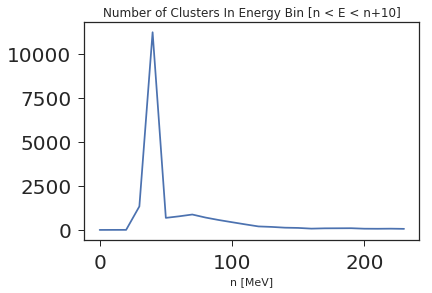

In [22]:
print(nEcut)
plt.plot([ebin*i for i in range(len(nEcut))],nEcut,'-')
plt.title("Number of Clusters In Energy Bin [n < E < n+"+str(ebin)+"]")
plt.xlabel("n [MeV]")
plt.show()

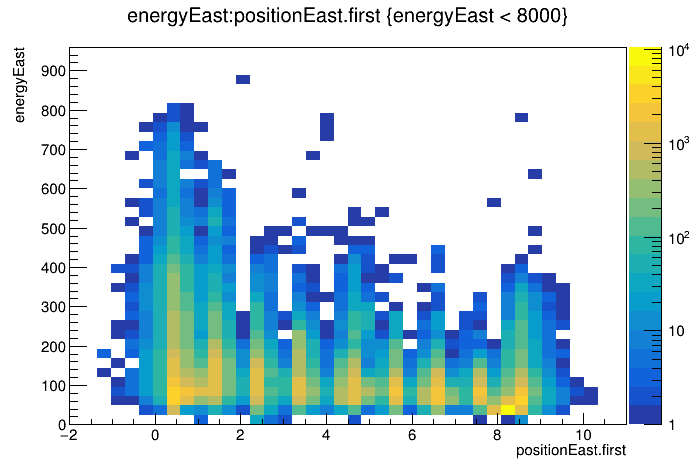

In [23]:
c = r.TCanvas()
terr.Draw("energyEast:positionEast.first","energyEast < 8000","colz")
c.SetLogz()
c.Draw()

In [24]:
xtalsEast = []
for calo in range(1,25):
    h1 = r.TH1D("h1","h1",54,0,54)
    terr.Draw("crystalsEast>>h1","caloNum == "+str(calo),"goff")
    xtals23 = [0 for x in range(54)]
    for i in range(h1.GetNbinsX()):
        #print(i)
        xtals23[i] = h1.GetBinContent(i+1)
    print(xtals23, len(xtals23))
    xtalsEast.append(xtals23)

[239.0, 461.0, 319.0, 328.0, 203.0, 188.0, 233.0, 243.0, 181.0, 310.0, 573.0, 416.0, 381.0, 282.0, 293.0, 335.0, 353.0, 256.0, 125.0, 167.0, 293.0, 257.0, 293.0, 159.0, 187.0, 999.0, 931.0, 211.0, 254.0, 247.0, 327.0, 365.0, 312.0, 212.0, 1027.0, 938.0, 213.0, 215.0, 208.0, 376.0, 428.0, 383.0, 328.0, 1096.0, 952.0, 164.0, 165.0, 73.0, 233.0, 277.0, 333.0, 246.0, 283.0, 171.0] 54
[235.0, 307.0, 210.0, 354.0, 386.0, 302.0, 187.0, 256.0, 221.0, 358.0, 430.0, 320.0, 455.0, 490.0, 364.0, 298.0, 513.0, 420.0, 166.0, 233.0, 239.0, 226.0, 286.0, 245.0, 309.0, 349.0, 239.0, 170.0, 236.0, 247.0, 318.0, 359.0, 306.0, 289.0, 376.0, 297.0, 99.0, 165.0, 173.0, 310.0, 399.0, 405.0, 398.0, 401.0, 334.0, 85.0, 85.0, 65.0, 214.0, 344.0, 361.0, 354.0, 374.0, 327.0] 54
[297.0, 381.0, 469.0, 290.0, 275.0, 195.0, 307.0, 328.0, 205.0, 524.0, 609.0, 641.0, 349.0, 343.0, 209.0, 448.0, 544.0, 419.0, 493.0, 536.0, 498.0, 254.0, 222.0, 22.0, 365.0, 515.0, 507.0, 287.0, 382.0, 349.0, 209.0, 272.0, 166.0, 524.0, 5

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirector

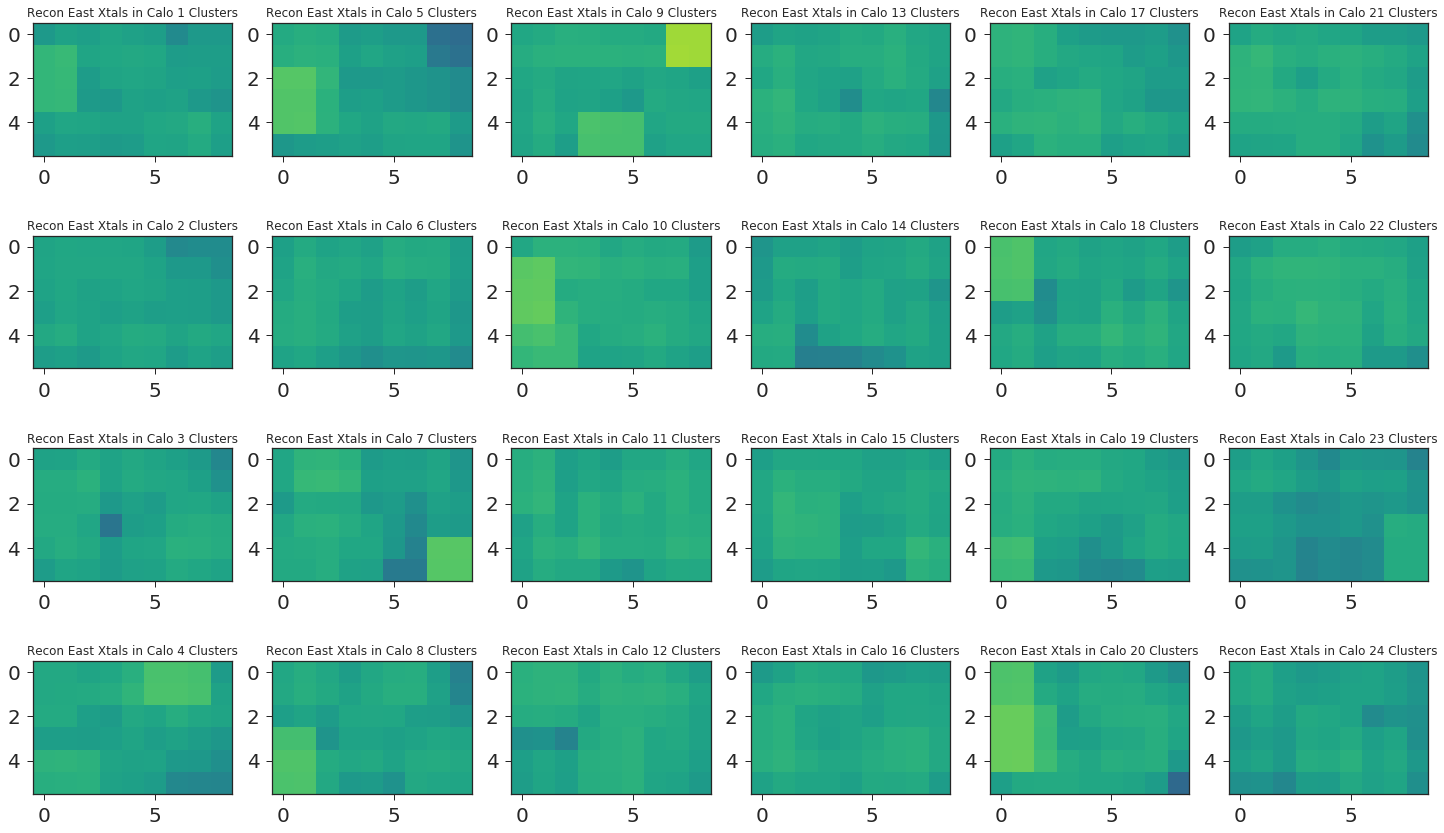

In [25]:
ncols = 6
nrows = 4
fig,ax = plt.subplots(nrows, ncols,figsize=(25,15))

for i, calo in enumerate(xtalsEast):
    ax[int(i % nrows), int(np.floor(i/nrows))].imshow(arrangeXtals(calo),
                                                      norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=10**5), cmap='viridis')
    ax[int(i % nrows), int(np.floor(i/nrows))].set_title("Recon East Xtals in Calo "+str(i+1)+" Clusters")

plt.show()

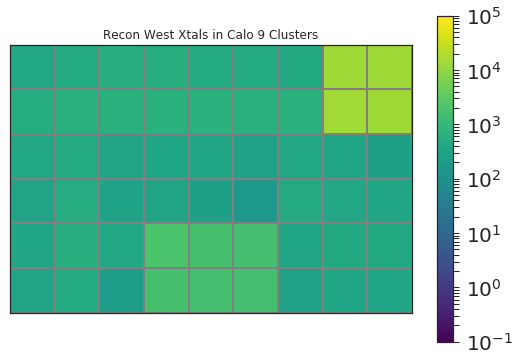

In [26]:
fig,ax = plt.subplots(figsize=(9,6))

calo = 9

plt.imshow(arrangeXtals(xtalsEast[calo-1]),norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=10**5), cmap='viridis')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, 9, 1))
ax.set_yticks(np.arange(-.5, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(length=0)

ax.grid(color='grey', linestyle='-', linewidth=2)

plt.title("Recon West Xtals in Calo "+str(calo)+" Clusters")
plt.show()

---

# Now lets compare the lonely clusters from recon west

In [27]:
terr2.Print()

******************************************************************************
*Tree    :wveNoPartnerTree: wveNoPartnerTree                                       *
*Entries :  4881991 : Total =      2405690274 bytes  File  Size =  542542820 *
*        :          : Tree compression factor =   4.44                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :  4881991 : Total  Size=   19593898 bytes  File Size  =     185734 *
*Baskets :      625 : Basket Size=      32000 bytes  Compression= 105.43     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :  4881991 : Total  Size=   19595785 bytes  File Size  =     187733 *
*Baskets :      625 : Basket Size=      32000 bytes  Compression= 104.31     *
*.............................................

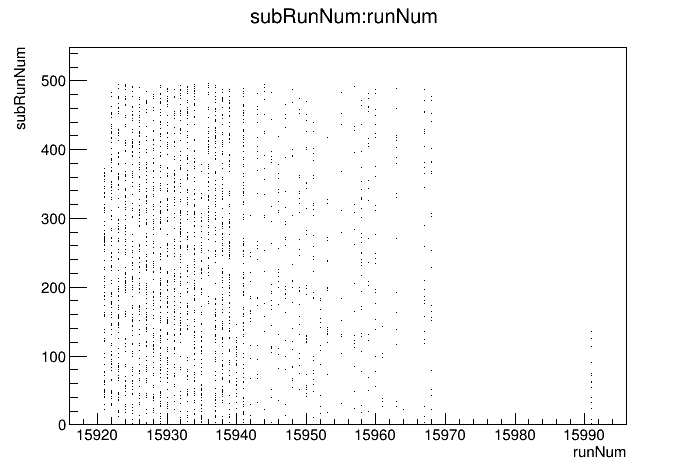

In [28]:
c = r.TCanvas()
terr2.Draw("subRunNum:runNum","","")
c.Draw()

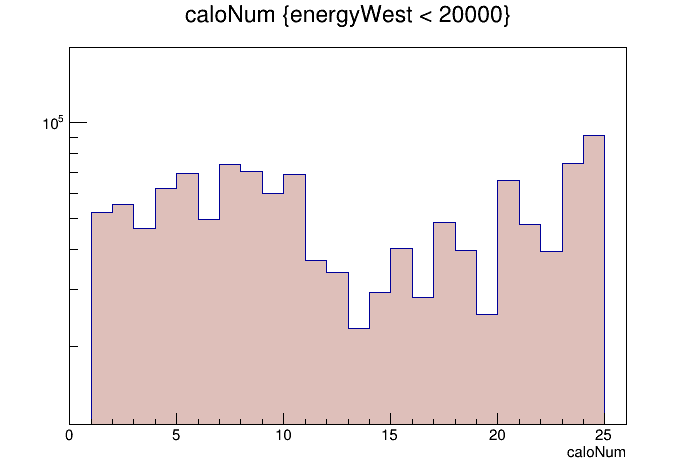

In [29]:
c = r.TCanvas()
terr2.Draw("caloNum","energyWest < 20000")
c.SetLogy()
c.Draw()

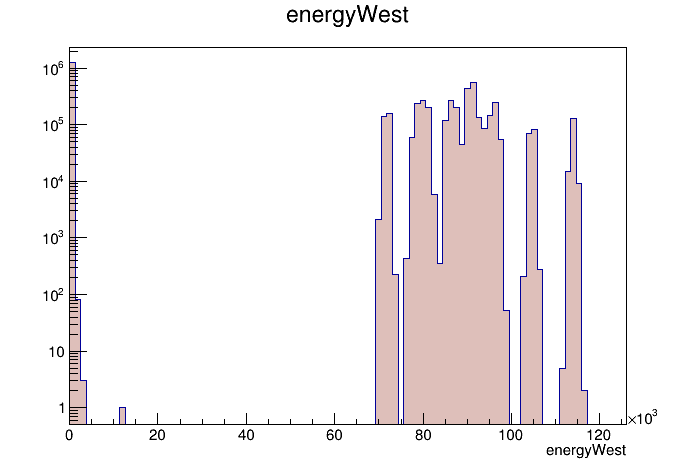

In [30]:
c = r.TCanvas()
terr2.Draw("energyWest")
c.SetLogy()
c.Draw()

Need to filter out the laser hits (which are not included in the recon east fits)

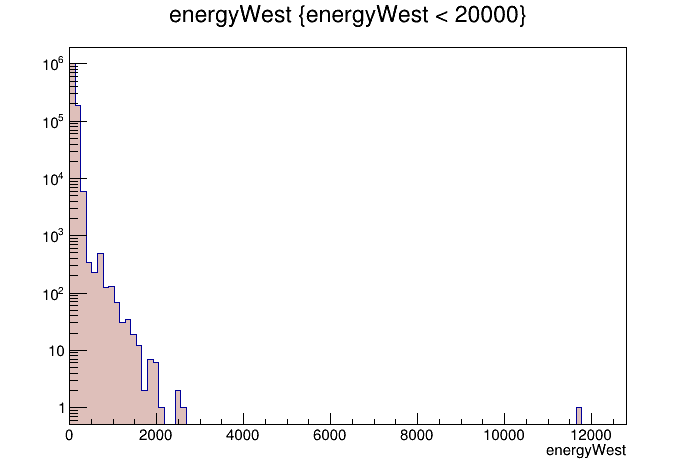

In [31]:
c = r.TCanvas()
terr2.Draw("energyWest","energyWest < 20000")
c.SetLogy()
c.Draw()

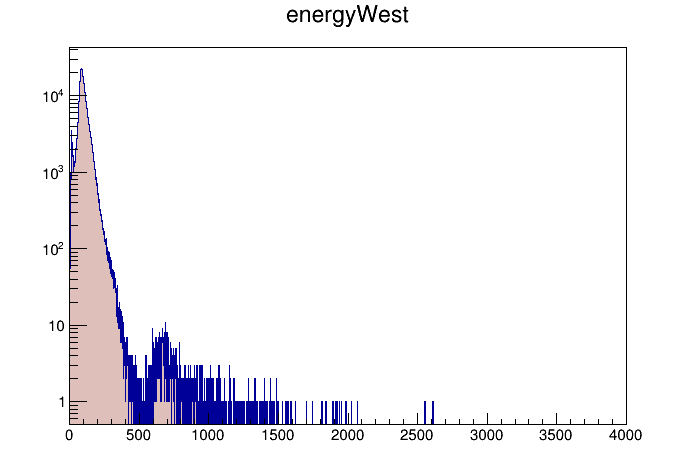

In [32]:
c = r.TCanvas()
hi = r.TH1D("hi","energyWest",4000,0,4000)
terr2.Draw("energyWest>>hi","energyWest < 20000","goff")
hi.SetFillColorAlpha(45,0.5)
hi.Draw()
c.SetLogy()
c.Draw()

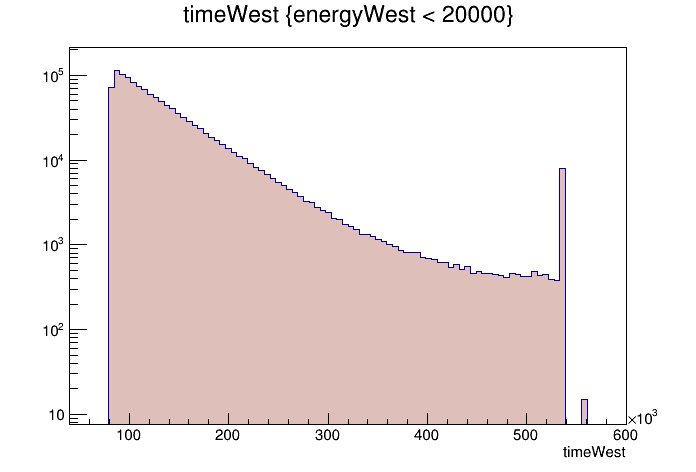

In [33]:
c = r.TCanvas()
terr2.Draw("timeWest", "energyWest < 20000")
c.SetLogy()
c.Draw()

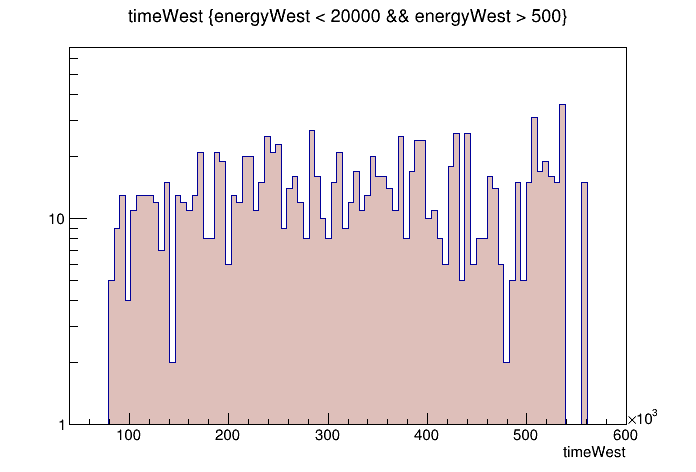

In [34]:
c = r.TCanvas()
terr2.Draw("timeWest", "energyWest < 20000 && energyWest > 500")
c.SetLogy()
c.Draw()

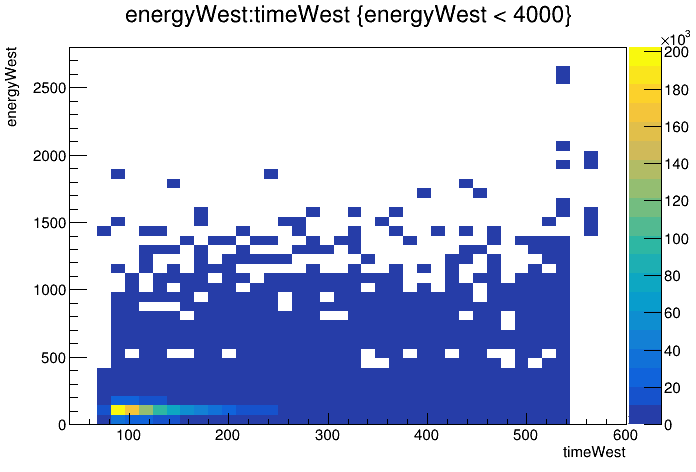

In [35]:
c = r.TCanvas()
terr2.Draw("energyWest:timeWest", "energyWest < 4000","colz")
#c.SetLogy()
#c.SetLogz()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).


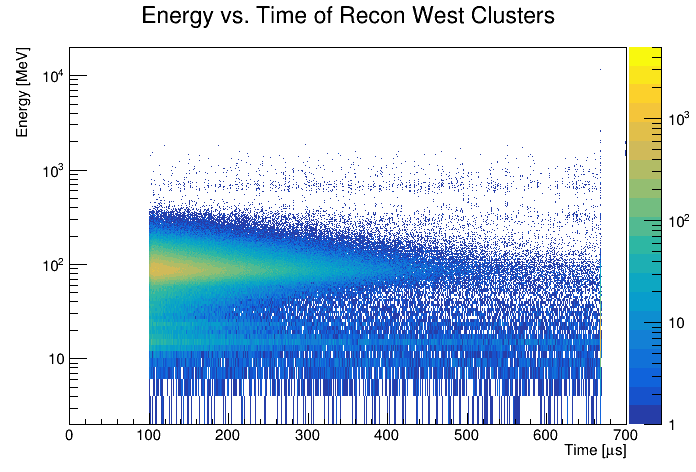

In [36]:
c = r.TCanvas()
hi = r.TH2D("hi","Energy vs. Time of Recon West Clusters; Time [#mus]; Energy [MeV]"
            ,700,0,700,10000,0,20000)
terr2.Draw("energyWest:timeWest/1000*1.25>>hi","","goff")
hi.GetZaxis().SetRangeUser(1,5 * 10**3)
hi.Draw("colz")
c.SetLogz()
c.SetLogy()
c.Draw()

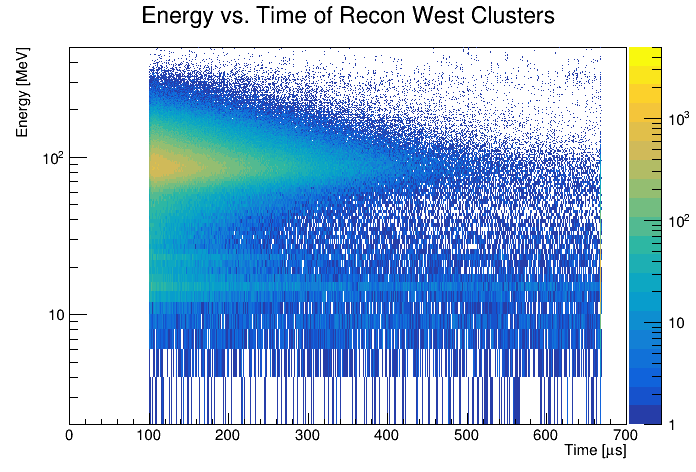

In [37]:
c = r.TCanvas()
hi.GetYaxis().SetRangeUser(0,500)
hi.Draw("colz")
c.SetLogz()
c.SetLogy()
c.Draw()

Lots of low energy events at late times

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).


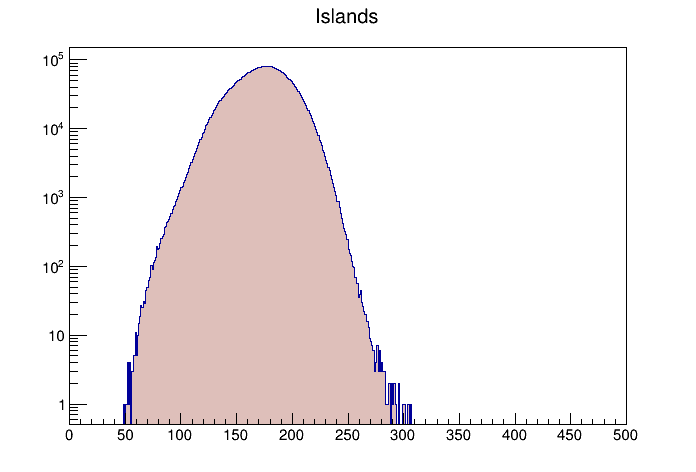

In [38]:
c = r.TCanvas()
hi = r.TH1D("hi","Islands",500,0,500)
terr2.Draw("island>>hi","","goff")
hi.SetFillColorAlpha(45,0.5)
hi.Draw()
c.SetLogy()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).


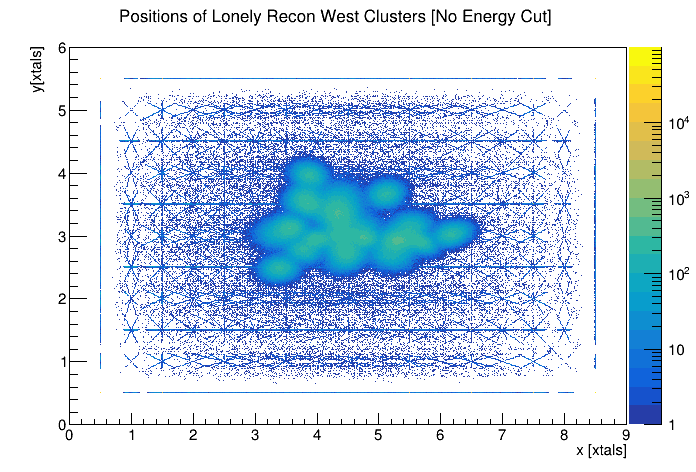

In [39]:
c = r.TCanvas()
hi = r.TH2D("hi","Positions of Lonely Recon West Clusters [No Energy Cut]; x [xtals]; y[xtals]",900,0,9,600,0,6)
terr2.Draw("positionWest.second:positionWest.first>>hi","","goff")
hi.Draw("colz")
c.SetLogz()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).


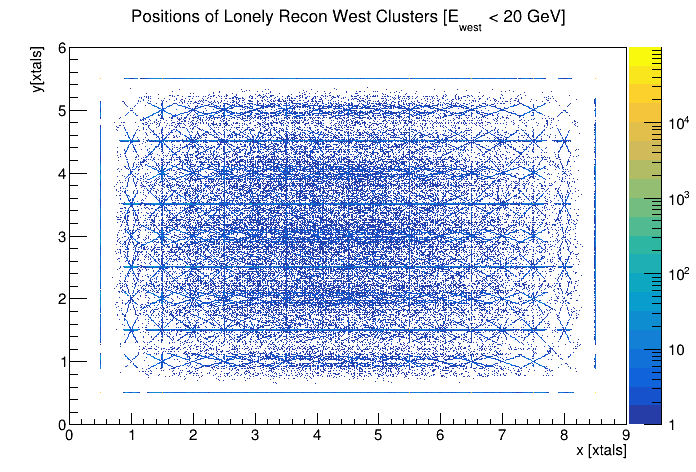

In [40]:
c = r.TCanvas()
hi = r.TH2D("hi","Positions of Lonely Recon West Clusters [E_{west} < 20 GeV]; x [xtals]; y[xtals]",900,0,9,600,0,6)
terr2.Draw("positionWest.second:positionWest.first>>hi","energyWest < 20000","goff")
hi.Draw("colz")
c.SetLogz()
c.Draw()

In [41]:
positionsVecWest = []
for i in range(24):
    hi = r.TH2D("hi","Positions of Lonely Recon West Clusters in Calo "+str(i+1),900,0,9,600,0,6)
    terr2.Draw("positionWest.second:positionWest.first>>hi","caloNum == "+str(i+1)+" && energyWest < 20000","goff")
    positionsVecWest.append(hi.Clone("h"+str(i+1)))

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirector

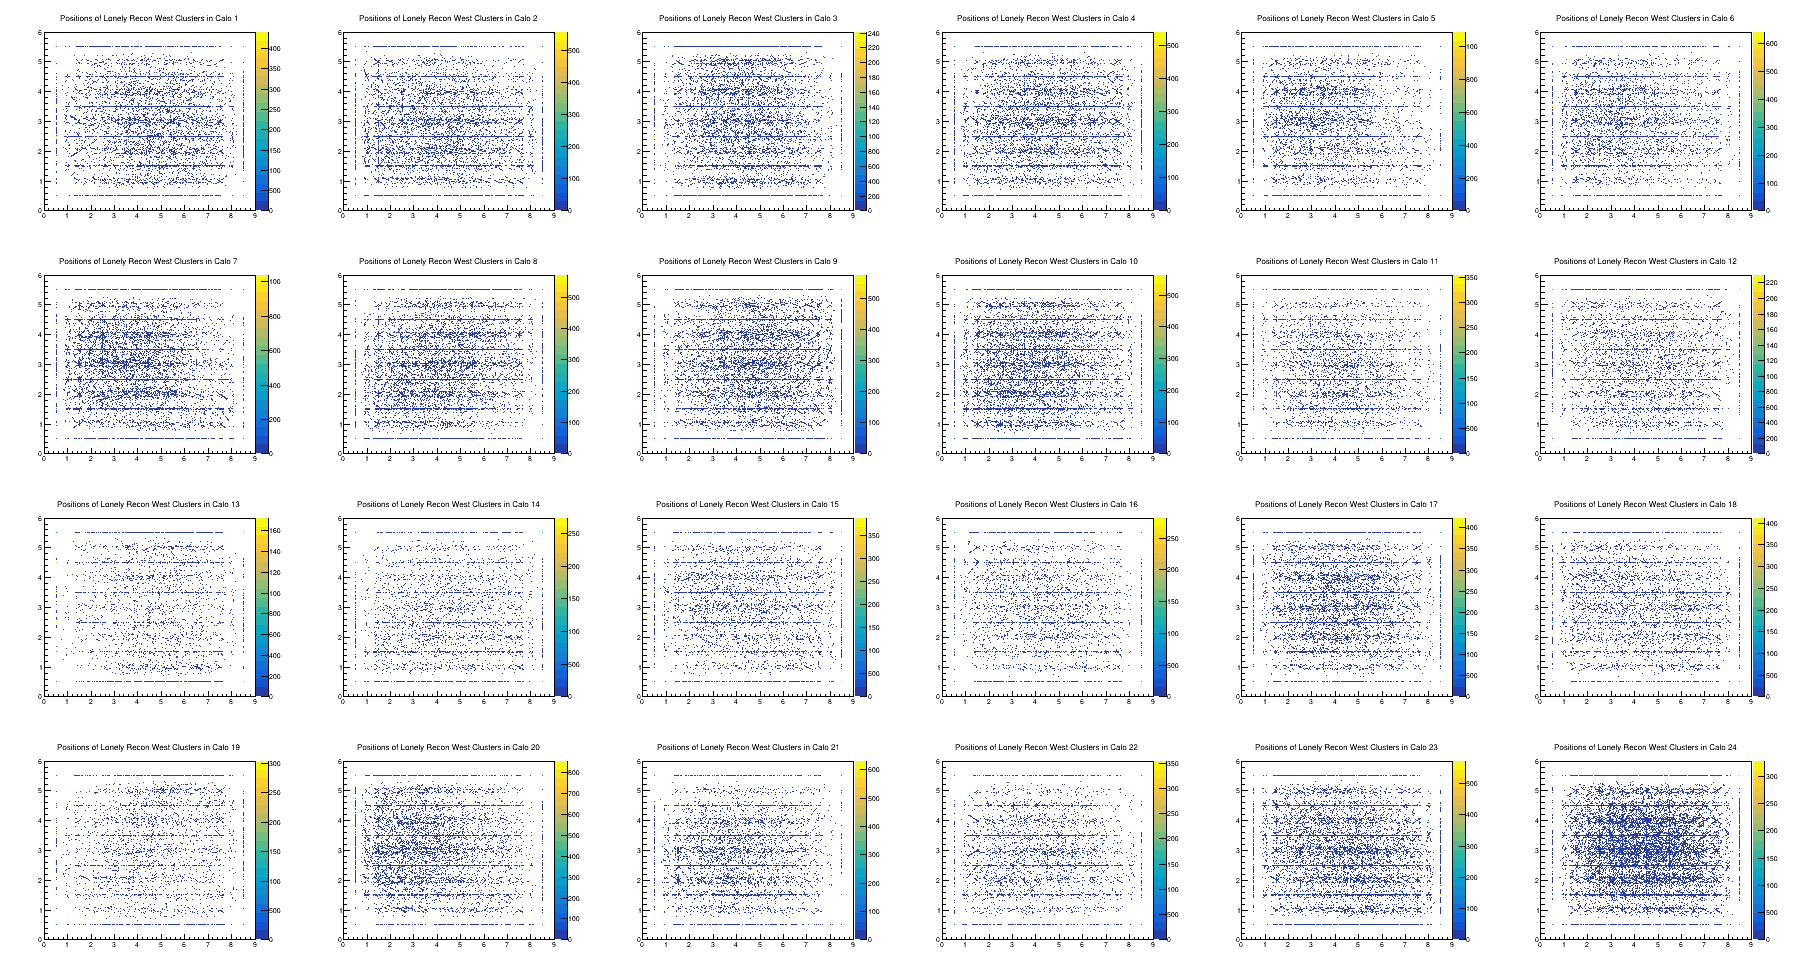

In [42]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(6,4)

nWest = []

for i, hi in enumerate(positionsVecWest):
    c.cd(i+1)
    hi.Draw("COLZ")
    nWest.append( hi.GetEntries() )
c.Draw()

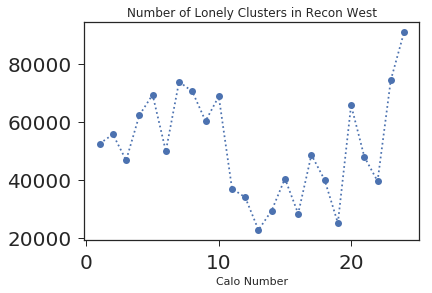

In [43]:
plt.plot([x+1 for x in range(24)],nWest,'o:')
plt.title('Number of Lonely Clusters in Recon West')
plt.xlabel('Calo Number')
plt.show()

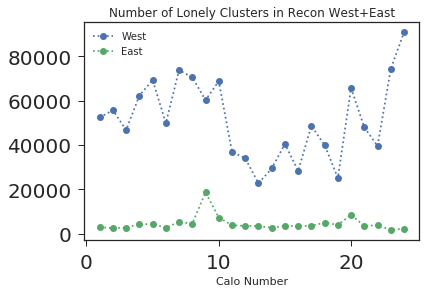

In [44]:
plt.plot([x+1 for x in range(24)],nWest,'o:',label='West')
plt.plot([x+1 for x in range(24)],nEast,'o:',label='East')
plt.title('Number of Lonely Clusters in Recon West+East')
plt.xlabel('Calo Number')
plt.legend()
plt.show()

In [45]:
positionsVec24Ecut = []
ebin = 10
for i in range(35):
    hi = r.TH2D("hi","Positions of Lonely Recon West Clusters in Calo 24 ["+str(ebin*(i))+" MeV < E < "+str(ebin*(i+1))+" MeV]",900,0,9,600,0,6)
    terr2.Draw("positionWest.second:positionWest.first>>hi","caloNum == 9 && energyWest < "+str(ebin*(i+1))+" && energyWest > "+str(ebin*i),"goff")
    positionsVec24Ecut.append(hi.Clone("h"+str(i+1)))

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirector

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


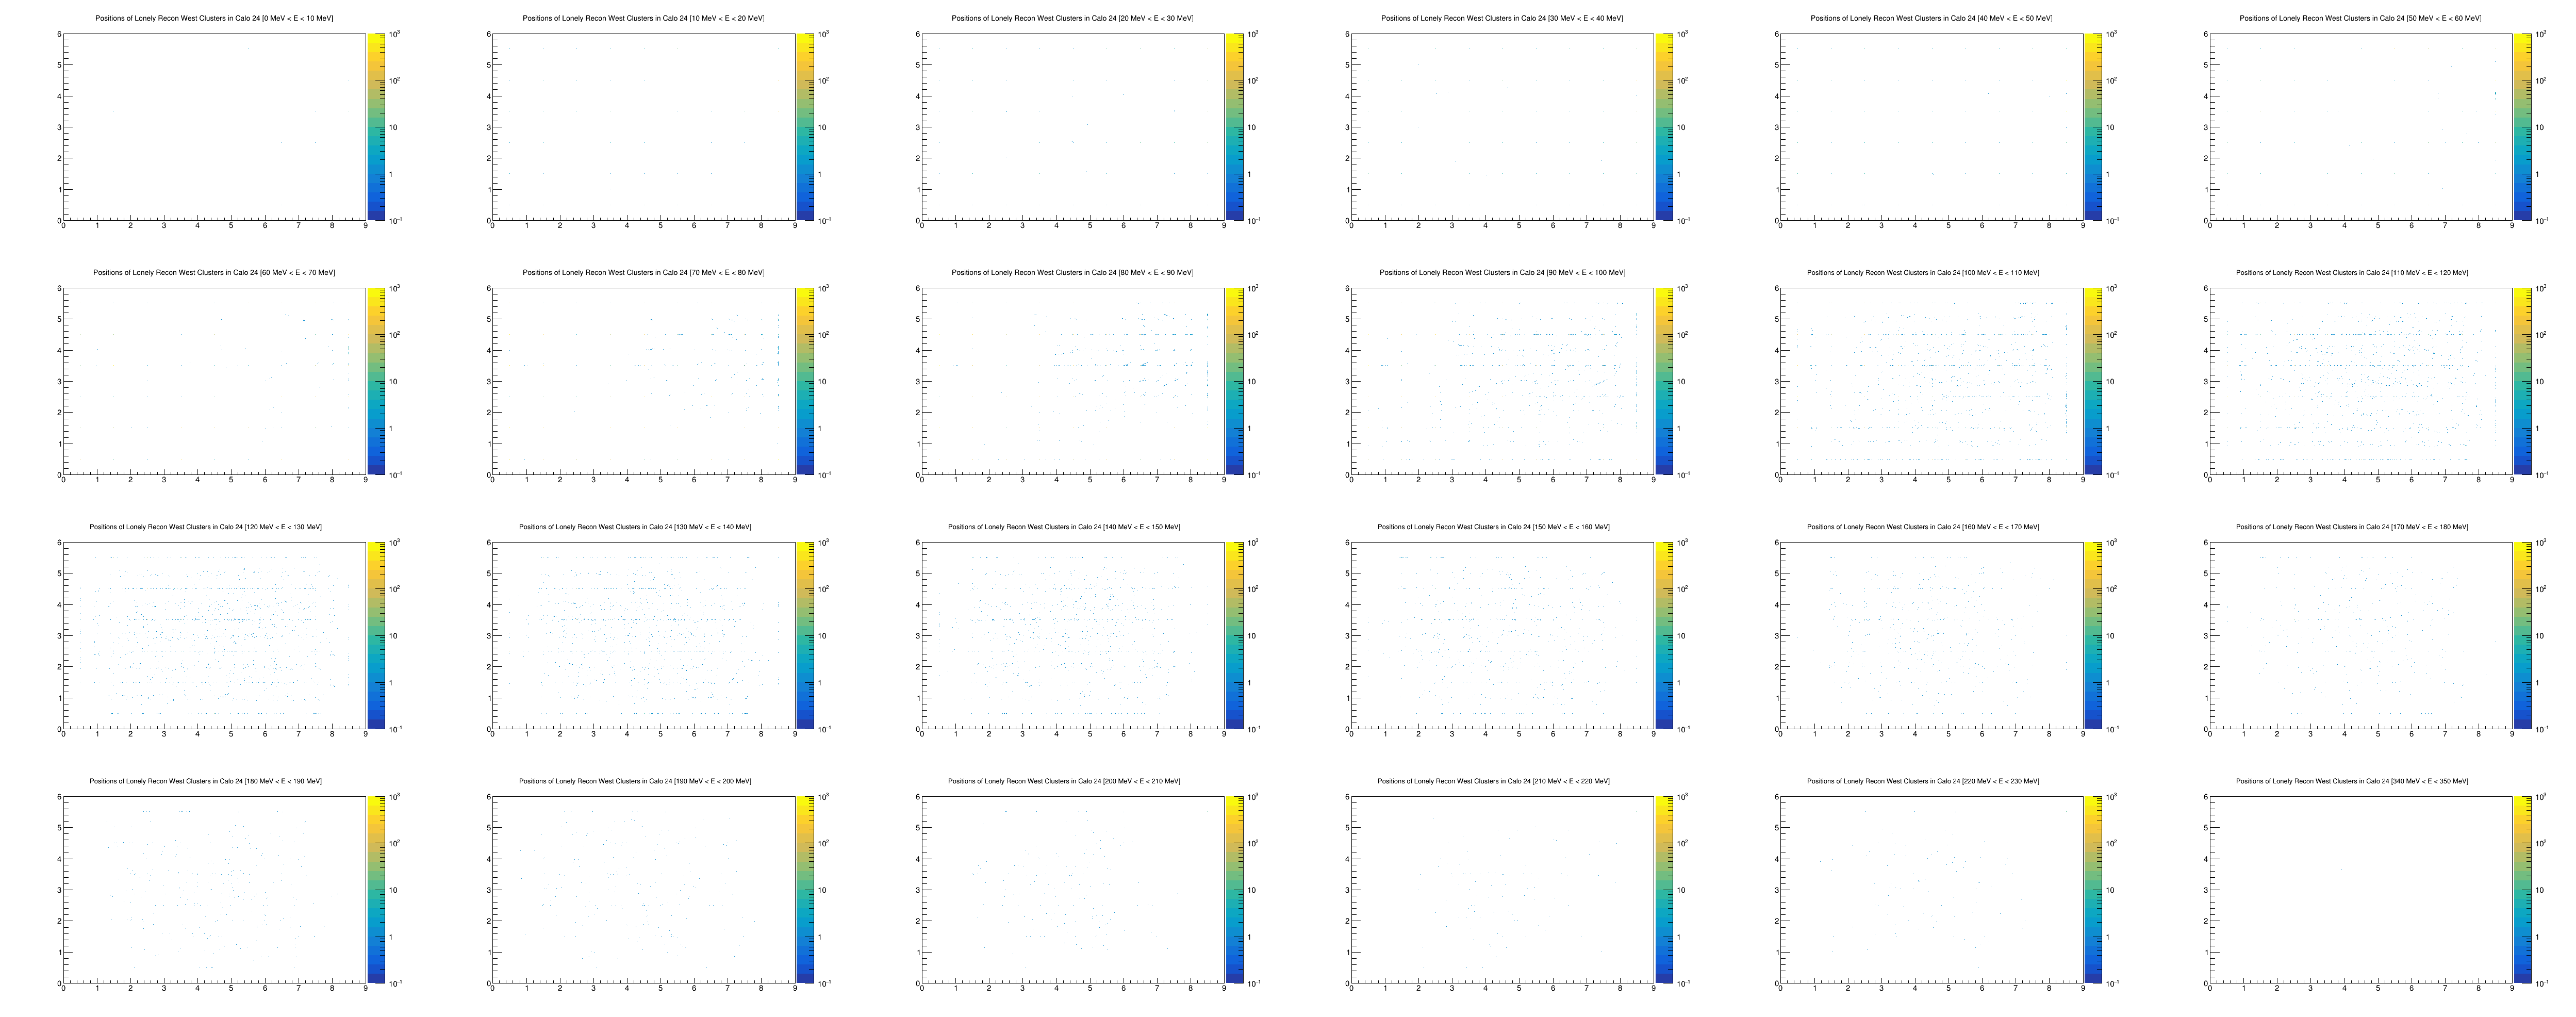

In [46]:
c = r.TCanvas("c","c",5000,2000)
c.Divide(6,4)
for i, hi in enumerate(positionsVec24Ecut):
    c.cd(i+1)
    hi.GetZaxis().SetRangeUser(0.1,1000)
    r.gPad.SetLogz()
    hi.Draw("COLZ")
c.Draw()

In [47]:
nEcutWest = []
for i, hi in enumerate(positionsVec24Ecut):
    nEcutWest.append(hi.GetEntries())

[21.0, 657.0, 275.0, 677.0, 5461.0, 4340.0, 4832.0, 10445.0, 11516.0, 7201.0, 4724.0, 3194.0, 2008.0, 1304.0, 951.0, 681.0, 519.0, 360.0, 259.0, 197.0, 151.0, 101.0, 101.0, 69.0, 44.0, 32.0, 32.0, 18.0, 10.0, 10.0, 6.0, 6.0, 5.0, 5.0, 1.0]


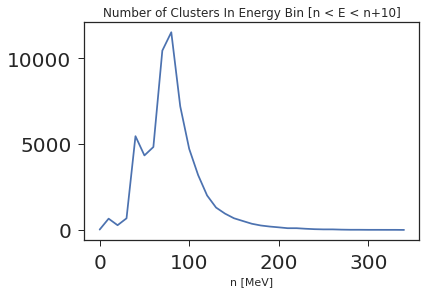

In [48]:
print(nEcutWest)
plt.plot([ebin*i for i in range(len(nEcutWest))],nEcutWest,'-')
plt.title("Number of Clusters In Energy Bin [n < E < n+"+str(ebin)+"]")
plt.xlabel("n [MeV]")
plt.show()

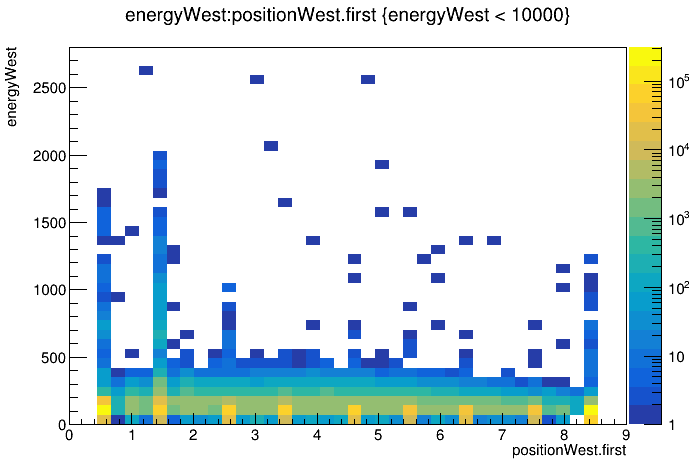

In [49]:
c = r.TCanvas()
terr2.Draw("energyWest:positionWest.first","energyWest < 10000","colz")
c.SetLogz()
c.Draw()

In [50]:
xtals = []
for calo in range(1,25):
    h1 = r.TH1D("h1","h1",54,0,54)
    terr2.Draw("crystalsWest>>h1","caloNum == "+str(calo)+" && energyWest < 20000","goff")
    xtals23 = [0 for x in range(54)]
    for i in range(h1.GetNbinsX()):
        #print(i)
        xtals23[i] = h1.GetBinContent(i+1)
    print(xtals23, len(xtals23))
    xtals.append(xtals23)

[1517.0, 607.0, 750.0, 537.0, 594.0, 364.0, 353.0, 408.0, 979.0, 2953.0, 385.0, 952.0, 983.0, 718.0, 487.0, 354.0, 668.0, 2795.0, 3981.0, 454.0, 658.0, 768.0, 863.0, 412.0, 3251.0, 692.0, 4707.0, 3527.0, 616.0, 597.0, 664.0, 1907.0, 667.0, 478.0, 743.0, 5002.0, 2235.0, 342.0, 416.0, 342.0, 776.0, 562.0, 352.0, 651.0, 2921.0, 2331.0, 387.0, 86.0, 451.0, 608.0, 391.0, 535.0, 489.0, 1062.0] 54
[3458.0, 397.0, 455.0, 258.0, 477.0, 366.0, 495.0, 767.0, 2096.0, 2810.0, 644.0, 384.0, 256.0, 473.0, 623.0, 1127.0, 1810.0, 4763.0, 3637.0, 733.0, 641.0, 360.0, 746.0, 738.0, 1871.0, 1518.0, 6585.0, 3067.0, 841.0, 621.0, 374.0, 715.0, 920.0, 1173.0, 2442.0, 2969.0, 1540.0, 293.0, 446.0, 218.0, 312.0, 435.0, 909.0, 684.0, 3495.0, 810.0, 277.0, 233.0, 197.0, 291.0, 377.0, 581.0, 765.0, 2049.0] 54
[1786.0, 423.0, 580.0, 909.0, 665.0, 735.0, 602.0, 473.0, 1263.0, 2197.0, 409.0, 976.0, 609.0, 1810.0, 792.0, 574.0, 676.0, 2140.0, 1789.0, 580.0, 379.0, 560.0, 802.0, 505.0, 852.0, 548.0, 2823.0, 1742.0, 29

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TDirector

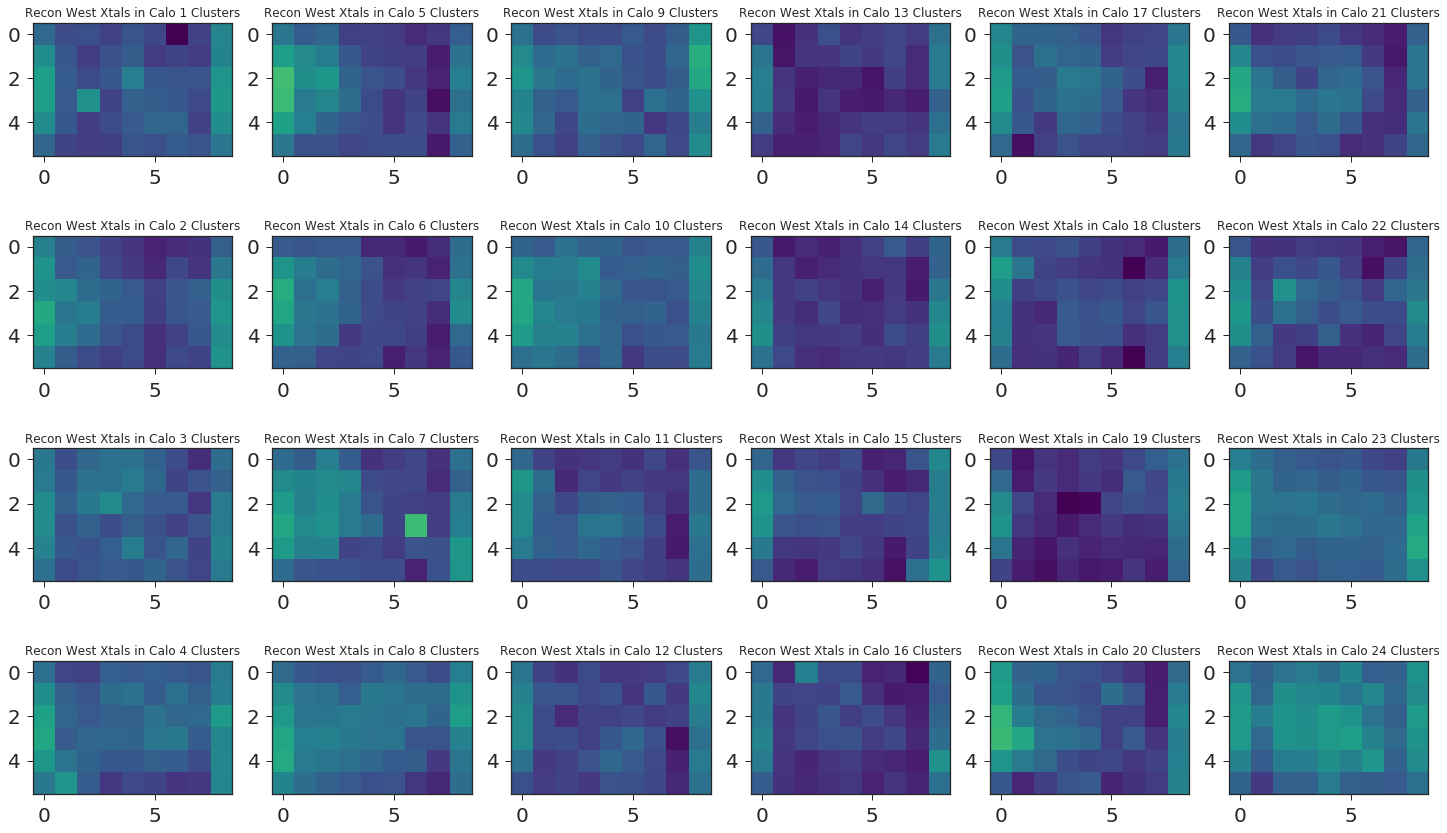

In [51]:
ncols = 6
nrows = 4
fig,ax = plt.subplots(nrows, ncols,figsize=(25,15))

for i, calo in enumerate(xtals):
    ax[int(i % nrows), int(np.floor(i/nrows))].imshow(arrangeXtals(calo),
                                                      norm=matplotlib.colors.LogNorm(vmin=10**2, vmax=10**5), cmap='viridis')
    ax[int(i % nrows), int(np.floor(i/nrows))].set_title("Recon West Xtals in Calo "+str(i+1)+" Clusters")

plt.show()

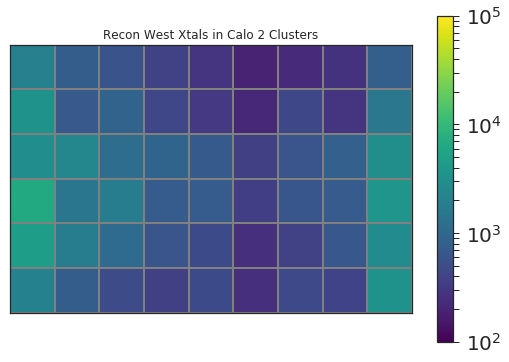

In [52]:
fig,ax = plt.subplots(figsize=(9,6))

calo = 2

plt.imshow(arrangeXtals(xtals[calo-1]),norm=matplotlib.colors.LogNorm(vmin=100, vmax=10**5), cmap='viridis')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, 9, 1))
ax.set_yticks(np.arange(-.5, 6, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(length=0)

ax.grid(color='grey', linestyle='-', linewidth=2)

plt.title("Recon West Xtals in Calo "+str(calo)+" Clusters")
plt.show()

--- 

# Lets see if we can draw any of the islands which dont match up individually, particularly one which is > 500 meV

Error in <THistPainter::PaintInit>: log scale requested with a negative argument (-1.000000)


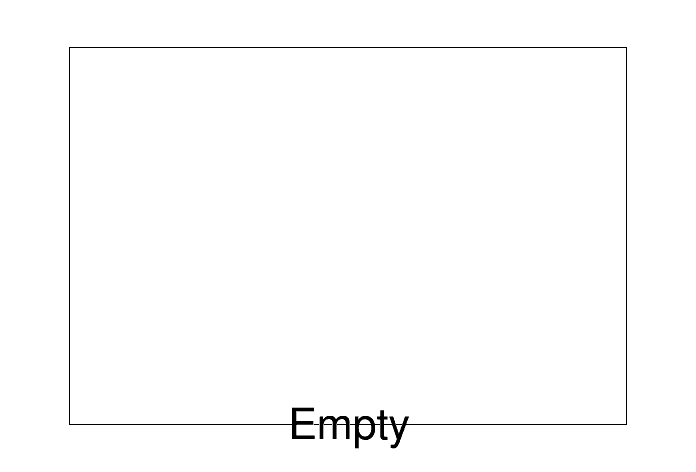

In [53]:
c = r.TCanvas()
terr2.Draw("energyWest","runNum == 16355 && subRunNum == 132 && energyWest < 20000","")
c.SetLogy()
c.Draw()

Error in <THistPainter::PaintInit>: log scale requested with a negative argument (-1.000000)


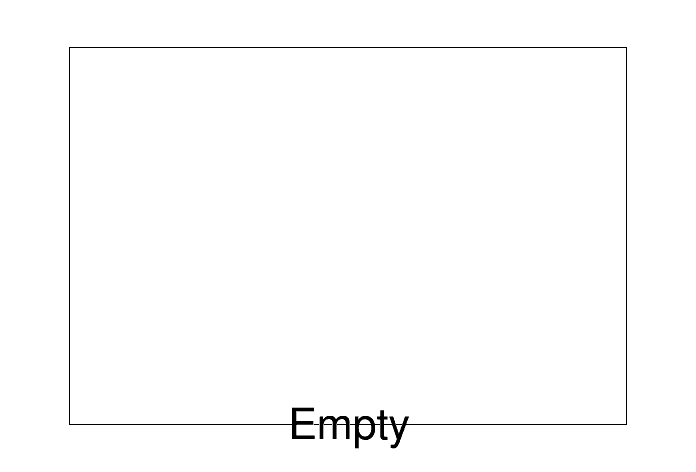

In [54]:
c = r.TCanvas()
terr.Draw("energyEast","runNum == 16355 && subRunNum == 132","")
c.SetLogy()
c.Draw()

In [55]:
fwave = r.TFile("./data/waveforms_run16355_00132.root")
twave = fwave.Get("islands").Get("islands").Get("islandTree")

In [56]:
#twave.Print()

In [57]:
fout = r.TFile("temp_tree_storage.root","recreate")
condition = "runNum == 16355 && subRunNum == 132 " 
conditionEast = "runNum == 16355 && subRunNum == 132" 

terr2_partial = terr2.CopyTree( condition )
tcomp_partial = tcomp.CopyTree( condition )
teast_partial = teast.CopyTree( conditionEast )
twest_partial = twest.CopyTree( condition )

print(terr2_partial.GetEntries())
print(tcomp_partial.GetEntries())
print(teast_partial.GetEntries())
print(twest_partial.GetEntries())

0
0
0
0


In [58]:
counter = 0
for i, entry in enumerate(terr2_partial):
    if counter > 10:
        break
    if(entry.energyWest > 20000 or entry.energyWest < 40):
        continue
    else:
        counter = counter+1
    print("Recon West Energy:", entry.energyWest, 'MeV')
    print("           Time", entry.timeWest/1000*1.25, "us")
    print("           Unique ID:", constructUniqueIDnon(entry))
    
    islandPlot(constructUniqueIDnon(entry), teast_partial, twest_partial, twave, False)
    print("*******************************************************************************************")

In [59]:
counter = 0
for i, entry in enumerate(terr):
    if counter > 10:
        break
    if(entry.energyEast > 500 or entry.runNum != 16355 or entry.subRunNum != 132):
        continue
    else:
        counter = counter+1
    print("Recon East Energy:", entry.energyEast)
    print("           Time", entry.timeEast/1000*1.25, "us")
    print("           Unique ID:", constructUniqueIDnon(entry))

    islandPlot(constructUniqueIDnon(entry), teast_partial, twest_partial, twave, False)
    print("*******************************************************************************************")

 runNum == 16355 && subRunNum == 132 && eventNum == 216 && caloNum == 1 && islandWest == 194


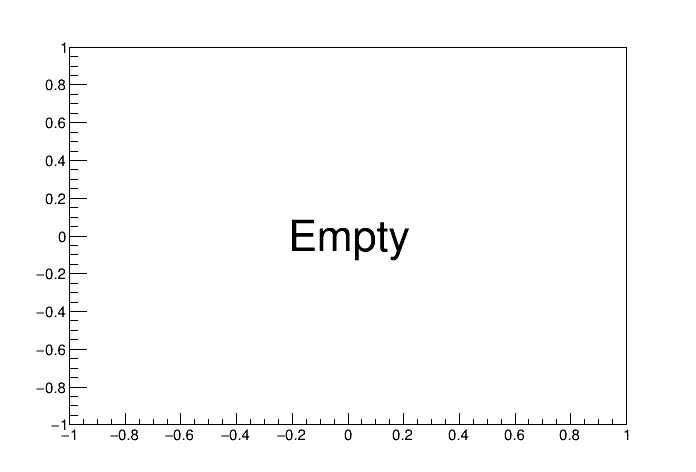

In [60]:
c = r.TCanvas()
condition = constructConditionFromUniqueIDWest(1635500132002160000100194)
print(condition)
twest.Draw("energy:time",condition,"")
c.Draw()

---

# Comparison of east and west 

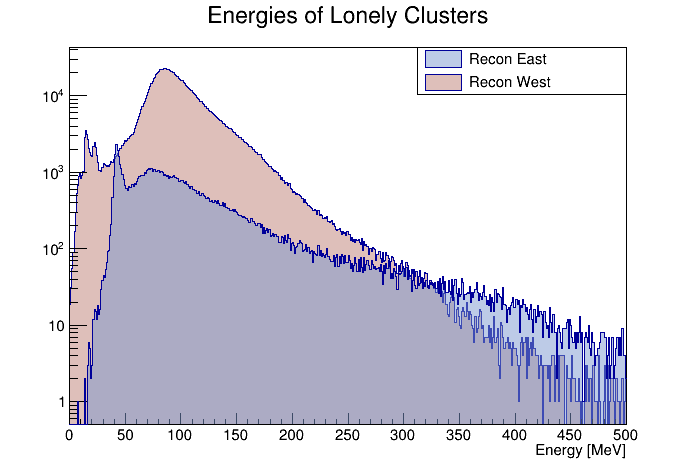

In [61]:
c = r.TCanvas()
hi = r.TH1D("hi","E_{east}",4000,0,4000)
terr.Draw("energyEast>>hi","","goff")
hi.SetFillColorAlpha(38,0.5)

hi2 = r.TH1D("hi2","Energies of Lonely Clusters; Energy [MeV]",4000,0,4000)
terr2.Draw("energyWest>>hi2","","goff")
hi2.SetFillColorAlpha(45,0.5)

hi2.GetXaxis().SetRangeUser(0,500)

hi2.Draw()
hi.Draw("SAME")

leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(hi ,"Recon East", "f")
leg.AddEntry(hi2 ,"Recon West", "f")
leg.Draw()

c.SetLogy()
c.Draw()

In [62]:
fxtals = open('SipmGainSettings.txt','r')

sipmGains = []

for x in fxtals:
    x = x.rstrip()
    if not x: continue
    #print(x)
    #print(x[-3:-1])
    if "sipm" in x:
        try:
            sipmGains.append(int(x[-3:-1]))
        except:
            print(x, x[-3:-1])
            sipmGains.append(0)
        #print(x)
    
print(len(sipmGains))
print(sipmGains)
    
fxtals.close()

"sipm15":0, :0
1296
[51, 65, 49, 59, 55, 55, 56, 40, 56, 71, 56, 53, 55, 74, 65, 62, 60, 46, 58, 49, 51, 61, 59, 51, 80, 65, 58, 70, 75, 64, 50, 80, 42, 48, 52, 30, 64, 57, 76, 61, 43, 44, 48, 51, 54, 64, 72, 51, 56, 57, 53, 38, 53, 42, 35, 70, 63, 45, 56, 75, 55, 55, 35, 70, 67, 69, 51, 46, 33, 46, 51, 54, 49, 62, 69, 47, 56, 60, 38, 33, 40, 78, 51, 36, 53, 54, 53, 44, 80, 53, 76, 53, 67, 62, 33, 30, 56, 30, 37, 73, 73, 73, 69, 53, 56, 52, 45, 40, 46, 49, 49, 50, 62, 46, 49, 50, 44, 61, 46, 45, 35, 80, 67, 46, 54, 47, 43, 41, 30, 32, 58, 56, 63, 39, 37, 76, 40, 47, 53, 52, 80, 59, 30, 51, 64, 80, 46, 48, 53, 38, 47, 43, 54, 69, 53, 31, 30, 40, 46, 57, 36, 80, 65, 44, 70, 75, 54, 48, 54, 42, 80, 80, 48, 56, 51, 46, 57, 56, 57, 55, 56, 44, 51, 49, 45, 62, 60, 42, 58, 80, 41, 54, 46, 58, 32, 52, 56, 63, 53, 60, 68, 33, 52, 50, 41, 49, 50, 79, 69, 46, 51, 49, 30, 50, 47, 61, 77, 45, 51, 58, 40, 54, 50, 39, 62, 65, 59, 66, 43, 62, 39, 41, 60, 63, 54, 51, 49, 43, 46, 48, 32, 30, 47, 80, 62,

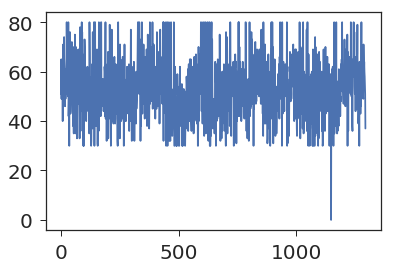

In [63]:
plt.plot(sipmGains)
plt.show()

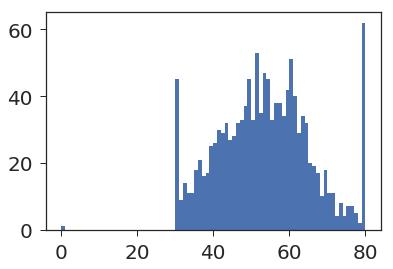

In [64]:
plt.hist(sipmGains,range=(0,80),bins=80)
plt.show()

In [65]:
allXtalsWest = []

for xtalsi in xtals:
    for xtal in xtalsi:
        allXtalsWest.append(xtal)
print(allXtalsWest)

[1517.0, 607.0, 750.0, 537.0, 594.0, 364.0, 353.0, 408.0, 979.0, 2953.0, 385.0, 952.0, 983.0, 718.0, 487.0, 354.0, 668.0, 2795.0, 3981.0, 454.0, 658.0, 768.0, 863.0, 412.0, 3251.0, 692.0, 4707.0, 3527.0, 616.0, 597.0, 664.0, 1907.0, 667.0, 478.0, 743.0, 5002.0, 2235.0, 342.0, 416.0, 342.0, 776.0, 562.0, 352.0, 651.0, 2921.0, 2331.0, 387.0, 86.0, 451.0, 608.0, 391.0, 535.0, 489.0, 1062.0, 3458.0, 397.0, 455.0, 258.0, 477.0, 366.0, 495.0, 767.0, 2096.0, 2810.0, 644.0, 384.0, 256.0, 473.0, 623.0, 1127.0, 1810.0, 4763.0, 3637.0, 733.0, 641.0, 360.0, 746.0, 738.0, 1871.0, 1518.0, 6585.0, 3067.0, 841.0, 621.0, 374.0, 715.0, 920.0, 1173.0, 2442.0, 2969.0, 1540.0, 293.0, 446.0, 218.0, 312.0, 435.0, 909.0, 684.0, 3495.0, 810.0, 277.0, 233.0, 197.0, 291.0, 377.0, 581.0, 765.0, 2049.0, 1786.0, 423.0, 580.0, 909.0, 665.0, 735.0, 602.0, 473.0, 1263.0, 2197.0, 409.0, 976.0, 609.0, 1810.0, 792.0, 574.0, 676.0, 2140.0, 1789.0, 580.0, 379.0, 560.0, 802.0, 505.0, 852.0, 548.0, 2823.0, 1742.0, 299.0, 720

In [66]:
allXtalsEast = []

for xtalsi in xtalsEast:
    for xtal in xtalsi:
        allXtalsEast.append(xtal)
print(allXtalsEast)

[239.0, 461.0, 319.0, 328.0, 203.0, 188.0, 233.0, 243.0, 181.0, 310.0, 573.0, 416.0, 381.0, 282.0, 293.0, 335.0, 353.0, 256.0, 125.0, 167.0, 293.0, 257.0, 293.0, 159.0, 187.0, 999.0, 931.0, 211.0, 254.0, 247.0, 327.0, 365.0, 312.0, 212.0, 1027.0, 938.0, 213.0, 215.0, 208.0, 376.0, 428.0, 383.0, 328.0, 1096.0, 952.0, 164.0, 165.0, 73.0, 233.0, 277.0, 333.0, 246.0, 283.0, 171.0, 235.0, 307.0, 210.0, 354.0, 386.0, 302.0, 187.0, 256.0, 221.0, 358.0, 430.0, 320.0, 455.0, 490.0, 364.0, 298.0, 513.0, 420.0, 166.0, 233.0, 239.0, 226.0, 286.0, 245.0, 309.0, 349.0, 239.0, 170.0, 236.0, 247.0, 318.0, 359.0, 306.0, 289.0, 376.0, 297.0, 99.0, 165.0, 173.0, 310.0, 399.0, 405.0, 398.0, 401.0, 334.0, 85.0, 85.0, 65.0, 214.0, 344.0, 361.0, 354.0, 374.0, 327.0, 297.0, 381.0, 469.0, 290.0, 275.0, 195.0, 307.0, 328.0, 205.0, 524.0, 609.0, 641.0, 349.0, 343.0, 209.0, 448.0, 544.0, 419.0, 493.0, 536.0, 498.0, 254.0, 222.0, 22.0, 365.0, 515.0, 507.0, 287.0, 382.0, 349.0, 209.0, 272.0, 166.0, 524.0, 503.0, 49

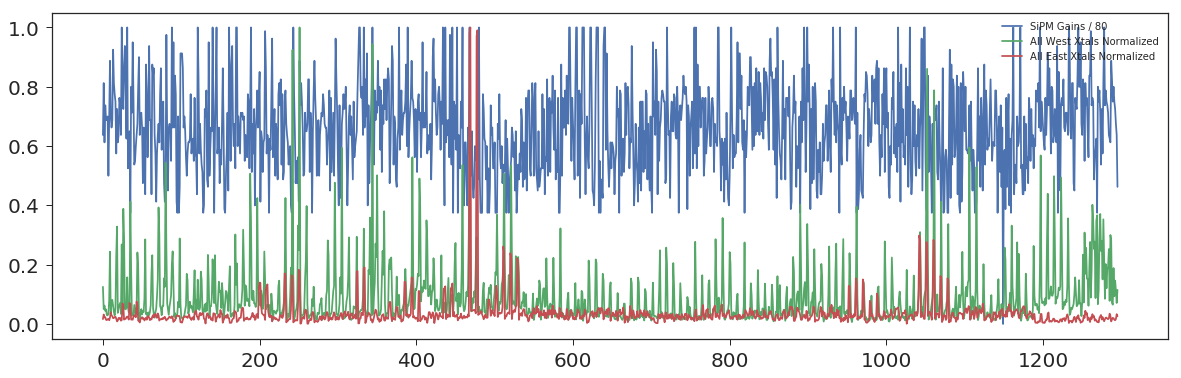

In [67]:
fig, ax = plt.subplots(figsize=(20,6))
plt.plot([x/80 for x in sipmGains],label='SiPM Gains / 80')
plt.plot([x/max(allXtalsWest) for x in allXtalsWest],label='All West Xtals Normalized')
plt.plot([x/max(allXtalsEast) for x in allXtalsEast],label='All East Xtals Normalized')
#plt.plot(allXtalsEast,label='All East Xtals')
plt.legend()
plt.show()